<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_45_08_TransitTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---



[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

Copyright (c) 2022, Prithwis Mukerjee All rights reserved.

This source code is licensed under the GNU GPL v3.0 -style license found in the LICENSE file in the root directory of this source tree.

#Rationale




#SetUp Environment

##Install Software

In [1]:
!pip -qq install pyswisseph                                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
!pip -qq install python-docx                                #https://python-docx.readthedocs.io/en/latest/
#!/usr/bin/python3 -m pip install "pymongo[srv]"            # Required only if used with Atlas remote servers
#!apt install mongodb > /dev/null                            # install local MongoDB server           
#!service mongodb start                                      # start Local MongoDB server instance

     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 5.6 MB 5.6 MB/s 


##Install, import prerequisites

In [2]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
import json
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from datetime import datetime
from datetime import timedelta
import pytz
from google.colab import files

#import matplotlib.pyplot as plt
#import math


In [3]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions
!wget -O p21utilsR.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utilsR.py      # report writing utility functions
!wget -O p21swe.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21swe.py            # Swiss Ephemeris functions
!wget -O p21YogInfo.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21YogInfo.py    # yog data - description and conditions 
# ---------------------------

#!wget -O Saraswati.png -q https://github.com/prithwis/parashar21/raw/main/images/Saraswati02.png                 
#!wget -O p21logo.png -q https://github.com/prithwis/parashar21/raw/main/images/p21logo-002-1.png   



In [4]:
import p21
import p21utils
import p21utilsR
import p21swe
#import p21YogInfo
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)
importlib.reload(p21utilsR)
importlib.reload(p21swe)
#importlib.reload(p21YogInfo)

10 Yogs on record
0 : Amala Yog | 10th from Moon OR Lagna should have a benefic
1 : RajLakshana Yog | Jupiter, Venus, Mercury, Moon should be in Lagna or they should be in a Kendra
2 : Chatussagara Yog | All the Kendras 1/4/7/10 are occupied by planets, Ra, Ke not counted here
3 : Adhi678 Yog | Benefics located in 6/7/8th  from Moon
4 : Chandra Mangal Yog | Mars Conjoins Moon or  Mars and Moon in Mutual Aspect
5 : Kemadruma Yog : No planets on either sides of the Moon
6 : Anapha Yog |Planets other than Sun in 12th Place from Moon
7 : Sunapha Yog |Planets other than Sun in 2nd Place from Moon
8 : Dhurdhura Yog | Planets on both sides of the Moon
9 : Gajakesari Yog | Jupiter is in Kendra or 1,4,7,10th from Moon


<module 'p21swe' from '/content/p21swe.py'>

In [5]:
#Download Swiss Ephemeris Files 
!wget -q http://www.astro.com/ftp/swisseph/ephe/seas_18.se1
!wget -q http://www.astro.com/ftp/swisseph/ephe/semo_18.se1
!wget -q http://www.astro.com/ftp/swisseph/ephe/sepl_18.se1
!mkdir ephe
!mv *.se1 ephe
#------------------------------
# Configure SWE with appropriate parameters
#
p21swe.C01_configSWE()

#New Way

In [74]:
#Static Data
TZ_OffHours = 5.5
DoB_Time = '12:01'
PoB_Lat = 25.43
PoB_Lon = 81.85
Name = p21.gName
Gender = 'x'
tag1 = 'nil'
tag3 = 'nil'
tag5 = 'nil'

p21.ChartType = 'Rashi'

In [58]:
current = datetime.now(pytz.timezone('Asia/Kolkata'))
print(current)

2022-10-04 12:04:27.872218+05:30


In [169]:
numberOfDays = 120
sDate = datetime.now(pytz.timezone('Asia/Kolkata'))
cDate = sDate

setData(getData(cDate))
for count in range(numberOfDays):
    
    prevGrashiA = p21.GRashiA
    prevGLonRet = p21.GLonRet
    cDate += timedelta(days=1)

    setData(getData(cDate))

    getDelta(cDate,prevGrashiA,p21.GRashiA,prevGLonRet,p21.GLonRet)
    

16 Oct 22| Ma transits from  Vrish to  Mithun
18 Oct 22| Su transits from  Kanya to  Tula
19 Oct 22| Ve transits from  Kanya to  Tula
23 Oct 22| Sa turns DIRECT
27 Oct 22| Me transits from  Kanya to  Tula
31 Oct 22| Ma turns RETRO
12 Nov 22| Ve transits from  Tula to  Vrishchik
14 Nov 22| Ma transits from  Mithun to  Vrish
14 Nov 22| Me transits from  Tula to  Vrishchik
17 Nov 22| Su transits from  Tula to  Vrishchik
24 Nov 22| Ju turns DIRECT
03 Dec 22| Me transits from  Vrishchik to  Dhanu
06 Dec 22| Ve transits from  Vrishchik to  Dhanu
16 Dec 22| Su transits from  Vrishchik to  Dhanu
28 Dec 22| Me transits from  Dhanu to  Makar
30 Dec 22| Me turns RETRO
30 Dec 22| Ve transits from  Dhanu to  Makar
31 Dec 22| Me transits from  Makar to  Dhanu
13 Jan 23| Ma turns DIRECT
15 Jan 23| Su transits from  Dhanu to  Makar
18 Jan 23| Sa transits from  Makar to  Kumbh
19 Jan 23| Me turns DIRECT
23 Jan 23| Ve transits from  Makar to  Kumbh


In [136]:
def getData(cDT):
    DoB_Day = int(cDT.strftime("%-d"))
    DoB_Mon = int(cDT.strftime("%-m"))
    DoB_Year = int(cDT.strftime("%Y"))
    #print(DoB_Time)

    sData = [DoB_Day,DoB_Mon,DoB_Year,DoB_Time,TZ_OffHours,PoB_Lat,PoB_Lon,Name, Gender, tag1, tag3,tag5]
    sLabels = ['DoB_Day','DoB_Mon','DoB_Year','DoB_Time','TZ_OffHours','PoB_Lat','PoB_Lon','Name','Gender','tag1','tag3','tag5']
    return(pd.Series(sData, index = sLabels))

In [137]:
def setData(c):
    p21swe.C02_parsePersonData(c)
    p21swe.C03_convertDates()
    p21swe.C04_calculateGrahaPositions()
    p21swe.C05_buildGLonGRet()
    p21utils.R11_LocateGrahaInRashi()
    #print(p21.GRashiA)

In [170]:
def getDelta(cD,bA,aA,bR,aR,ShowMoonTransit = False):
    #print('getDelta',cD)
    cDs = cD.strftime("%d %b %y")+'|'
    for G in p21.Graha:
        if bA[G] != aA[G]:
            if G != 'Mo':
                print(cDs, G, 'TRANSITS from ', bA[G], 'to ', aA[G])
            else:
                if ShowMoonTransit:
                    print(cDs, G, 'transits from ', bA[G], 'to ', aA[G])
            #print(cDs, G, 'transits from ', bA[G], 'to ', aA[G])
        if bR['GRet'][G] != aR['GRet'][G]:
            #print(cD,G, 'changes from ', bR['GRet'][G], 'to ', aR['GRet'][G], ' retrograde')
            if bR['GRet'][G]:
                print(cDs, G, 'turns DIRECT')
            else:
                print(cDs, G, 'turns RETRO')

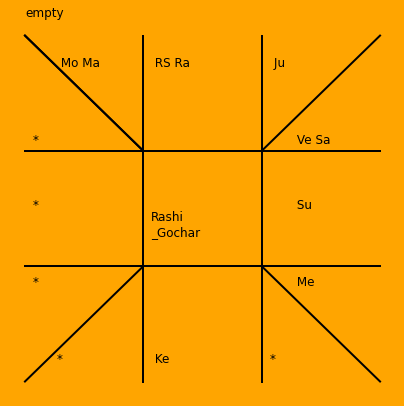

In [171]:
#p21.pName = p21.gName
#p21.cID = 'empty'
p21utilsR.R12B_drawChart_Bengal()

In [ ]:
#%%time
#
p21.AnalysisType = 'Rashi'                                     # one of ['Rashi','Navamsa']
#p21.AnalysisType = 'Navamsa'                                    # one of ['Rashi','Navamsa']
p21.ChartType = p21.AnalysisType
p21.Gochar = True
p21.Subject = 'IndiraG'
# 
# ------------------------------------------------------------
# Converts date/time info into a detailed horoscope chart 
# Stores the same in a JSON file, to be inserted into a local MongoDB database
# 
p21swe.C61_Cast2JSON(df0)

1 records processed, so far
Subject found IndiraG
La long reset to  275.593
5  records generated and stored in file peopleData.json


#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)